In [1]:
import os,sys,re
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#changing working directory
os.chdir("D:/GramenerMohak/")
os.listdir()

['Assignment_Description.xlsx',
 'Gramener Mohak Prawal.ipynb',
 'patient_data.xlsx']

In [3]:
## Reading data file
patient_df = pd.read_excel("patient_data.xlsx")

In [4]:
patient_df.head()

,Sl.No,Patient #,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,1,Patient 1,NI,Male,24.0,NO,15.0,8.0,2.66,Vegetarian,Occasional,5.687164,Fair,Negative
1,2,Patient 2,SI,Male,32.0,YES,27.0,9.0,1.27,NonVegetarian,Regular,4.071704,Dark,Positive
2,3,Patient 3,SI,Male,28.0,YES,29.0,10.0,1.18,Vegetarian,Occasional,5.509791,Wheatish,Negative
3,4,Patient 4,NE,NaN,33.0,NO,NaN,7.0,2.77,Vegetarian,NaN,5.165676,NaN,Positive
4,5,Patient 5,NE,Female,58.0,NO,21.0,9.0,1.55,Vegetarian,Regular,5.636116,Fair,Negative


In [5]:
## Exploratory Data Analysis
## Checking Null values
patient_df.isnull().sum(),len(patient_df)


(Sl.No                          0
 Patient #                     17
 Region                         1
 Gender                         5
 Age                            2
 Smokes                         3
 No of Ciggarets per day        1
 No of Hrs Sleep per Day        1
 No of Hrs Exercise per Day     2
 Diet                           6
 Alcoholic                      5
 Height                         3
 Complexion                     4
 Cancer Diagnosis Result        0
 dtype: int64, 1010)

#### Few columns do have some null values maximum is in patient id columns and for rest of columns null values are very less, we can impute or drop them

In [6]:
### checking the ratio of prediction class

In [7]:
patient_df['Cancer Diagnosis Result'].value_counts()/len(patient_df)

Positive    0.517822
Negative    0.482178
Name: Cancer Diagnosis Result, dtype: float64

In [8]:
patient_df.dtypes

Sl.No                           int64
Patient #                      object
Region                         object
Gender                         object
Age                           float64
Smokes                         object
No of Ciggarets per day       float64
No of Hrs Sleep per Day       float64
No of Hrs Exercise per Day     object
Diet                           object
Alcoholic                      object
Height                        float64
Complexion                     object
Cancer Diagnosis Result        object
dtype: object

In [9]:
patient_df.describe(include='object')

,Patient #,Region,Gender,Smokes,No of Hrs Exercise per Day,Diet,Alcoholic,Complexion,Cancer Diagnosis Result
count,993,1009,1005,1007,1008.00,1004,1005,1006,1010
unique,993,6,2,2,298.00,2,2,4,2
top,Patient 599,NE,Female,NO,0.62,Vegetarian,Regular,Wheatish,Positive
freq,1,350,504,531,9.00,511,507,252,523


In [10]:
## changign the data type of 'No of Hrs Exercise per Day'
## there is a text ( hrs) in the column value we need to clean it

def cleaner(x):
    if pd.isna(x) == False:
        if 'hrs' in str(x).lower():
            x = re.sub("[^0-9\.]",'',x)
            v = float(x)
        else:
            v = float(x)
    else:
        v = x
    return v

In [11]:
patient_df['No of Hrs Exercise per Day'] = patient_df['No of Hrs Exercise per Day'].apply(lambda x : cleaner(x))

In [12]:
patient_df.describe(include='all')

,Sl.No,Patient #,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
count,1010.000000,993,1009,1005,1008.000000,1007,1009.000000,1009.000000,1008.000000,1004,1005,1007.000000,1006,1010
unique,NaN,993,6,2,NaN,2,NaN,NaN,NaN,2,2,NaN,4,2
top,NaN,Patient 599,NE,Female,NaN,NO,NaN,NaN,NaN,Vegetarian,Regular,NaN,Wheatish,Positive
freq,NaN,1,350,504,NaN,531,NaN,NaN,NaN,511,507,NaN,252,523
mean,505.500000,NaN,NaN,NaN,39.055556,NaN,15.666997,7.971259,1.460685,NaN,NaN,5.020045,NaN,NaN
std,291.706188,NaN,NaN,NaN,14.175131,NaN,8.576460,1.411463,0.850617,NaN,NaN,0.578126,NaN,NaN
min,1.000000,NaN,NaN,NaN,4.000000,NaN,1.000000,6.000000,0.010000,NaN,NaN,4.000218,NaN,NaN
25%,253.250000,NaN,NaN,NaN,29.000000,NaN,8.000000,7.000000,0.740000,NaN,NaN,4.519333,NaN,NaN
50%,505.500000,NaN,NaN,NaN,38.500000,NaN,15.000000,8.000000,1.435000,NaN,NaN,5.021934,NaN,NaN
75%,757.750000,NaN,NaN,NaN,49.000000,NaN,23.000000,9.000000,2.180000,NaN,NaN,5.527988,NaN,NaN


In [13]:
patient_df.dtypes

Sl.No                           int64
Patient #                      object
Region                         object
Gender                         object
Age                           float64
Smokes                         object
No of Ciggarets per day       float64
No of Hrs Sleep per Day       float64
No of Hrs Exercise per Day    float64
Diet                           object
Alcoholic                      object
Height                        float64
Complexion                     object
Cancer Diagnosis Result        object
dtype: object

In [14]:
### imputing mean for float/int

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = patient_df.select_dtypes(include=numerics)

In [16]:
newdf.fillna(newdf.mean(), inplace=True)

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
newdf.isna().sum()

Sl.No                         0
Age                           0
No of Ciggarets per day       0
No of Hrs Sleep per Day       0
No of Hrs Exercise per Day    0
Height                        0
dtype: int64

In [85]:
newdf[newdf.columns[1:]].corr() ## there is not significant correlation between variables 

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height
Age,1.000000,0.014172,-0.005490,-0.023182,-0.009819
No of Ciggarets per day,0.014172,1.000000,0.022601,0.021295,0.007949
No of Hrs Sleep per Day,-0.005490,0.022601,1.000000,-0.013458,0.014947
No of Hrs Exercise per Day,-0.023182,0.021295,-0.013458,1.000000,-0.041426
Height,-0.009819,0.007949,0.014947,-0.041426,1.000000


In [18]:
## selecting object columns
objectcolumns = ['object']

newdf_object = patient_df.select_dtypes(include=objectcolumns)

In [19]:
newdf_object2=newdf_object[[c for c in newdf_object.columns if c != 'Patient #']]

In [20]:
for column in newdf_object2.columns:
    newdf_object2[column].fillna(newdf_object2[column].mode()[0], inplace=True)

In [21]:
newdf_object2.isna().sum()

Region                     0
Gender                     0
Smokes                     0
Diet                       0
Alcoholic                  0
Complexion                 0
Cancer Diagnosis Result    0
dtype: int64

In [22]:
newdf_object2['Patient #'] = newdf_object['Patient #']

In [23]:
newdf_object2.isna().sum()

Region                      0
Gender                      0
Smokes                      0
Diet                        0
Alcoholic                   0
Complexion                  0
Cancer Diagnosis Result     0
Patient #                  17
dtype: int64

In [24]:
## we don't need to imppute patient # since we don't need it in model

In [25]:
finaldf = pd.concat([newdf_object2,newdf],axis=1)

In [26]:
finaldf.isna().sum()

Region                         0
Gender                         0
Smokes                         0
Diet                           0
Alcoholic                      0
Complexion                     0
Cancer Diagnosis Result        0
Patient #                     17
Sl.No                          0
Age                            0
No of Ciggarets per day        0
No of Hrs Sleep per Day        0
No of Hrs Exercise per Day     0
Height                         0
dtype: int64

In [91]:
newdf_object2.columns

Index(['Region', 'Gender', 'Smokes', 'Diet', 'Alcoholic', 'Complexion',
       'Cancer Diagnosis Result', 'Patient #'],
      dtype='object')

In [27]:
### Modeling 

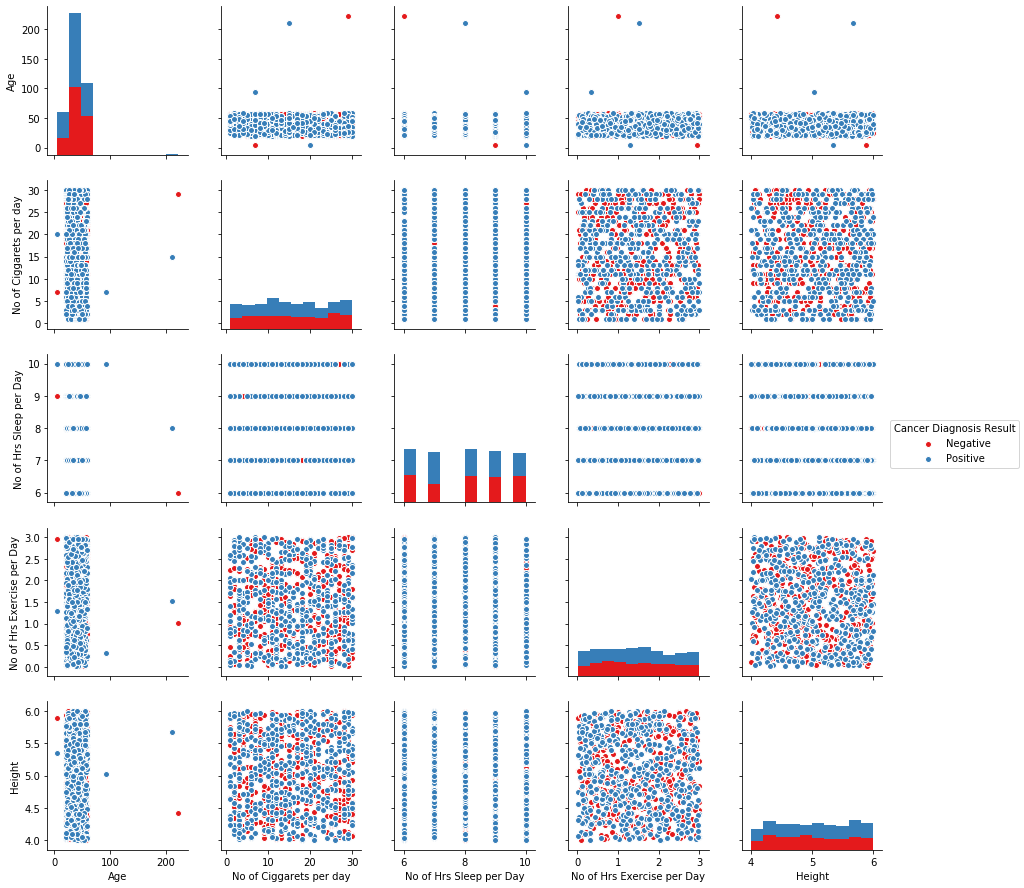

In [31]:
sns.pairplot(finaldf[list(newdf.columns[1:])+['Cancer Diagnosis Result']],hue='Cancer Diagnosis Result',palette='Set1')

In [92]:
finaldf.head()

,Region,Gender,Smokes,Diet,Alcoholic,Complexion,Cancer Diagnosis Result,Patient #,Sl.No,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height
0,NI,Male,NO,Vegetarian,Occasional,Fair,0,Patient 1,1,24.0,15.000000,8.0,2.66,5.687164
1,SI,Male,YES,NonVegetarian,Regular,Dark,1,Patient 2,2,32.0,27.000000,9.0,1.27,4.071704
2,SI,Male,YES,Vegetarian,Occasional,Wheatish,0,Patient 3,3,28.0,29.000000,10.0,1.18,5.509791
3,NE,Female,NO,Vegetarian,Regular,Brown,1,Patient 4,4,33.0,15.666997,7.0,2.77,5.165676
4,NE,Female,NO,Vegetarian,Regular,Fair,0,Patient 5,5,58.0,21.000000,9.0,1.55,5.636116


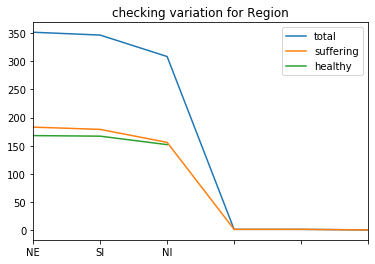

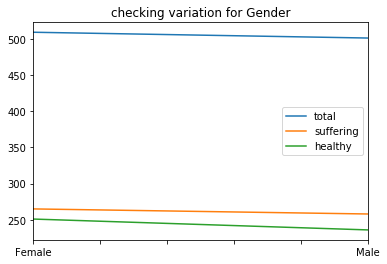

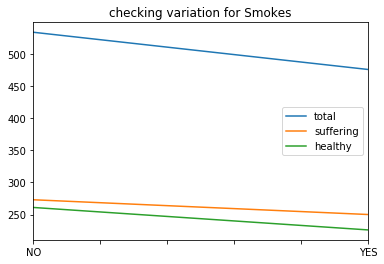

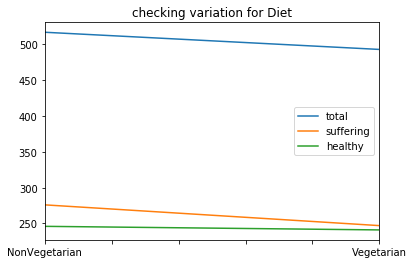

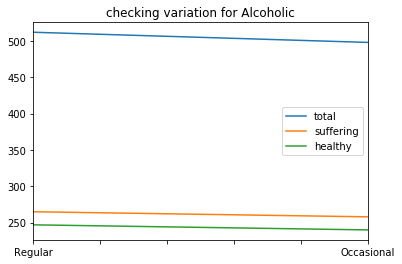

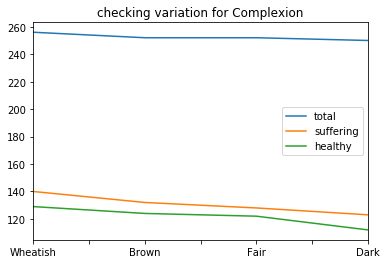

In [93]:
for c in ['Region', 'Gender', 'Smokes', 'Diet', 'Alcoholic', 'Complexion']:
    
   
    
    suffering=finaldf[finaldf['Cancer Diagnosis Result'] == 1][c].value_counts()
    healthy=finaldf[finaldf['Cancer Diagnosis Result'] == 0][c].value_counts()
    total=finaldf[c].value_counts()

    fig, axes = plt.subplots(nrows=1,ncols=1)
    #print("checking variation for {}".format(c))
    
    f1= total.plot(ax=axes,label='total')
    f1.title.set_text("checking variation for {}".format(c))
    
    f2=suffering.plot(ax=axes,label='suffering')
    #f2.title.set_text("checking variation for {}".format(c))
    
    f3=healthy.plot(ax=axes,label='healthy')
    #f3.title.set_text("checking variation for {}".format(c))

    axes.legend(loc='best')



In [32]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [33]:

finaldf['Cancer Diagnosis Result'], _ = pd.factorize(finaldf['Cancer Diagnosis Result'])


In [279]:
X_ohe = pd.get_dummies(finaldf[['Region','Gender','Smokes','Diet','Alcoholic','Complexion']],drop_first=True)

In [280]:
finaldf2 = pd.concat([finaldf,X_ohe],axis= 1)
finaldf2.shape

(1010, 26)

In [281]:
finaldf2=finaldf2.drop(['Region','Gender','Smokes','Diet','Alcoholic','Complexion'],axis = 1)

In [194]:
### trying interaction 

finaldf2['cigrate_sleep_interac'] =finaldf2['No of Ciggarets per day']*finaldf2['No of Hrs Sleep per Day']
finaldf2['cigrate_exercise_interac'] =finaldf2['No of Ciggarets per day']*finaldf2['No of Hrs Exercise per Day']
finaldf2['sleep_exercise_interac'] =finaldf2['No of Hrs Sleep per Day']*finaldf2['No of Hrs Exercise per Day']

In [195]:
# select features
feat_cols = [c for c in finaldf2 if c not in ['Cancer Diagnosis Result','Patient #','Sl.No']]
y = finaldf2['Cancer Diagnosis Result']


In [237]:
[g for g in feat_cols if 'Region' not in g]

['Age',
 'No of Ciggarets per day',
 'No of Hrs Sleep per Day',
 'No of Hrs Exercise per Day',
 'Height',
 'Gender_Male',
 'Smokes_YES',
 'Diet_Vegetarian',
 'Alcoholic_Regular',
 'Complexion_Dark',
 'Complexion_Fair',
 'Complexion_Wheatish',
 'cigrate_sleep_interac',
 'cigrate_exercise_interac',
 'sleep_exercise_interac']

In [248]:
X = finaldf2[[g for g in feat_cols if 'Region' not in g and 'Complexion' not in g]]

In [264]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True)

In [265]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred_logit=clf.predict(X_test)

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [266]:
print(classification_report(y_true = y_test,y_pred = pred_logit))

              precision    recall  f1-score   support

           0       0.47      0.38      0.42        97
           1       0.52      0.61      0.56       105

   micro avg       0.50      0.50      0.50       202
   macro avg       0.50      0.50      0.49       202
weighted avg       0.50      0.50      0.49       202



In [267]:
confusion_matrix(y_true = y_test,y_pred = pred_logit)

array([[37, 60],
       [41, 64]], dtype=int64)

In [268]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred_knn = neigh.predict(X_test)

In [269]:
print(classification_report(y_true = y_test,y_pred = pred_knn))

              precision    recall  f1-score   support

           0       0.44      0.45      0.45        97
           1       0.48      0.47      0.47       105

   micro avg       0.46      0.46      0.46       202
   macro avg       0.46      0.46      0.46       202
weighted avg       0.46      0.46      0.46       202



In [270]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear', C = 1)
clf_svm.fit(X_train, y_train)
pred_svc = clf_svm.predict(X_test)

In [271]:
print(classification_report(y_true = y_test,y_pred = pred_svc))

              precision    recall  f1-score   support

           0       0.48      0.36      0.41        97
           1       0.52      0.64      0.57       105

   micro avg       0.50      0.50      0.50       202
   macro avg       0.50      0.50      0.49       202
weighted avg       0.50      0.50      0.50       202



In [272]:
confusion_matrix(y_true = y_test,y_pred = pred_svc)

array([[35, 62],
       [38, 67]], dtype=int64)

In [273]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)
clf_rf.fit(X_train, y_train)
pred_rf = clf_rf.predict(X_test)

In [274]:
print(classification_report(y_true = y_test,y_pred = pred_rf))

              precision    recall  f1-score   support

           0       0.47      0.56      0.51        97
           1       0.51      0.43      0.47       105

   micro avg       0.49      0.49      0.49       202
   macro avg       0.49      0.49      0.49       202
weighted avg       0.49      0.49      0.49       202



In [275]:
### ensemble

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = svm.SVC(kernel='linear', C = 1)

In [276]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [277]:
pred_ensemble = eclf1.predict(X_test)

In [278]:
print(classification_report(y_true = y_test,y_pred = pred_ensemble))
accuracy_score(y_true = y_test,y_pred = pred_ensemble)

              precision    recall  f1-score   support

           0       0.48      0.40      0.44        97
           1       0.52      0.60      0.56       105

   micro avg       0.50      0.50      0.50       202
   macro avg       0.50      0.50      0.50       202
weighted avg       0.50      0.50      0.50       202



0.504950495049505

In [217]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [218]:
y_pred = dtree.predict(X_test)

In [219]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 128
Accuracy: 0.58


In [220]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_true =y_test ,y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.55      0.78      0.64       147
           1       0.65      0.38      0.48       156

   micro avg       0.58      0.58      0.58       303
   macro avg       0.60      0.58      0.56       303
weighted avg       0.60      0.58      0.56       303



In [221]:
## to set path for graphviz binary files
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

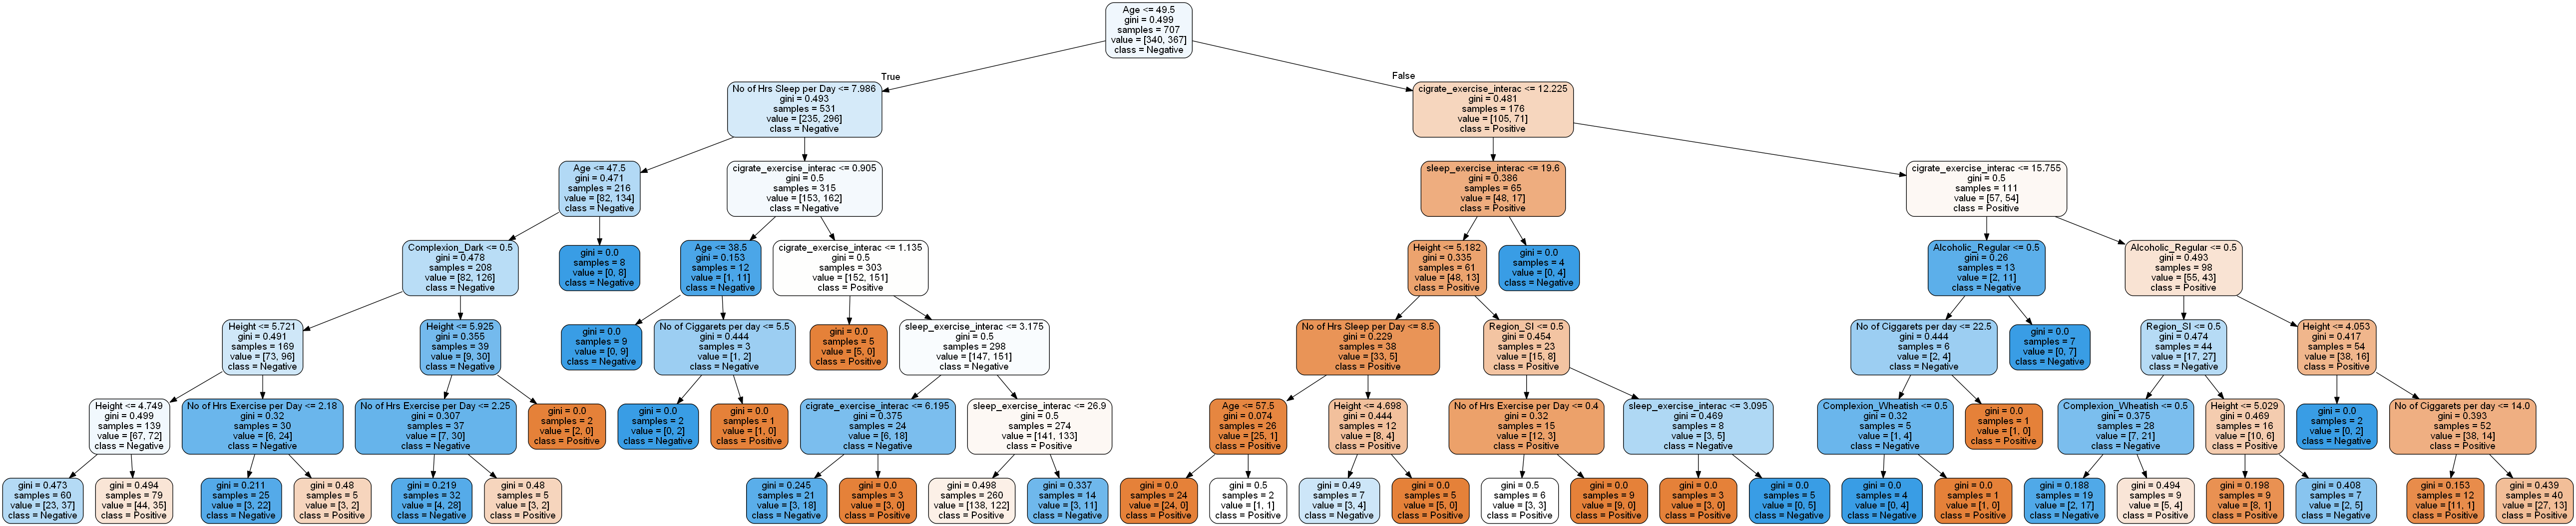

In [222]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=list(X.columns),  
                                class_names=['Positive', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [223]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10,random_state=0,shuffle=True)

In [224]:
fold_accuracy = []

# titanic_train["Sex"] = encoded_sex

for train_fold, valid_fold in cv.split(X):
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = dtree.fit(X = train, 
                           y = train_y)
    ### predict_valid=model.predict(valid)
    ### accuracy_valid=accuracy(valid_y,predict_valid)
    
    valid_acc = model.score(valid, valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.5346534653465347, 0.6039603960396039, 0.594059405940594, 0.43564356435643564, 0.5148514851485149, 0.594059405940594, 0.5544554455445545, 0.6138613861386139, 0.48514851485148514, 0.46534653465346537] 

Average accuracy:  0.5396039603960398
